# Доверительные интервалы для среднего
Для 61 большого города в Англии и Уэльсе известны средняя годовая смертность на 100000 населения (по данным 1958–1964) и концентрация кальция в питьевой воде (в частях на миллион). Чем выше концентрация кальция, тем жёстче вода. Города дополнительно поделены на северные и южные.

### Вопрос 1
Постройте 95% доверительный интервал для средней годовой смертности в больших городах. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

Будьте осторожны при использовании метода std()! Дело в том, что у объекта numpy он по умолчанию вычисляется как $\sqrt{\frac1{n}\sum_{i=1}^n\left(X_i-\bar{X}\right)^2}$,

а у объекта pandas — как $\sqrt{\frac1{n-1}\sum_{i=1}^n\left(X_i-\bar{X}\right)^2}$.

Нас интересует только второй вариант, несмещённая оценка стандартного отклонения.

Чтобы не думать всё время о том, правильно ли вычисляется в вашем случае std(), можно всегда использовать std(ddof=1) (ddof — difference in degrees of freedom), тогда нормировка всегда будет на n-1.

In [14]:
import pandas as pd
from statsmodels.stats.weightstats import _tconfint_generic
import math

In [5]:
df = pd.read_csv('water.txt', sep = '\t')

In [27]:
def get_confints(series, alpha = 0.05):
    mean_value = series.mean()
    mean_std_value = series.std(ddof = 1)/math.sqrt(len(series))
    confints = _tconfint_generic(mean_value, mean_std_value, len(series) - 1, alpha, 'two-sided')
    return confints

In [28]:
get_confints(df.mortality)

(1476.0833413552848, 1572.2117406119285)

### Вопрос 2
На данных из предыдущего вопроса постройте 95% доверительный интервал для средней годовой смертности по всем южным городам. Чему равна его верхняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [33]:
get_confints(df[df.location == 'South'].mortality)

(1320.1517462936238, 1433.463638321761)

### Вопрос 3
На тех же данных постройте 95% доверительный интервал для средней годовой смертности по всем северным городам. Пересекается ли этот интервал с предыдущим? Как вы думаете, какой из этого можно сделать вывод?

**Ответ**: Интервалы не пересекаются; видимо, средняя смертность на севере и на юге существенно разная

In [34]:
get_confints(df[df.location == 'North'].mortality)

(1586.5605251961385, 1680.6394748038613)

### Вопрос 4
Пересекаются ли 95% доверительные интервалы для средней жёсткости воды в северных и южных городах?

In [37]:
get_confints(df[df.location == 'South'].hardness)

(53.467198692036106, 86.071262846425441)

In [38]:
get_confints(df[df.location == 'North'].hardness)

(21.422487285724259, 39.377512714275738)

# Доверительные интервалы долей
### Вопрос 1
Большая часть млекопитающих неспособны во взрослом возрасте переваривать лактозу, содержащуюся в молоке. У людей за расщепление лактозы отвечает фермент лактаза, кодируемый геном LCT. У людей с вариантом 13910T этого гена лактаза продолжает функционировать на протяжении всей жизни. Распределение этого варианта гена сильно варьируется в различных генетических популяциях.

Из 50 исследованных представителей народа майя вариант 13910T был обнаружен у одного. Постройте нормальный 95% доверительный интервал для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [39]:
from statsmodels.stats.proportion import proportion_confint
proportion_confint(1, 50, method = 'normal')

(-0.018805307081790987, 0.058805307081790992)

### Вопрос 2
В условиях предыдущей задачи постройте 95% доверительный интервал Уилсона для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [40]:
proportion_confint(1, 50, method = 'wilson')

(0.0035392592716462362, 0.10495443589637815)

### Вопрос 3
Пусть в популяции майя действительно 2% носителей варианта 13910T, как в выборке, которую мы исследовали. Какой объём выборки нужен, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью ±0.01 на уровне доверия 95%?

In [42]:
from statsmodels.stats.proportion import samplesize_confint_proportion
import numpy as np
int(np.ceil(samplesize_confint_proportion(0.02, 0.01)))

753

### Вопрос 4
Постройте график зависимости объёма выборки, необходимого для оценки для доли носителей гена 13910T с точностью ±0.01 на уровне доверия 95%, от неизвестного параметра p. Посмотрите, при каком значении p нужно больше всего испытуемых. Как вы думаете, насколько вероятно, что выборка, которую мы анализируем, взята из случайной величины с этим значением параметра?

Как бы вы не ответили на последний вопрос, рассмотреть объём выборки, необходимый при таком p, всё равно полезно — это даёт максимально пессимистичную оценку необходимого объёма выборки.

Какой объём выборки нужен в худшем случае, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью ±0.01 на уровне доверия 95%?

In [47]:
p_values = np.linspace(0.01, 1, 100)

In [48]:
n_samples = map(lambda x: int(np.ceil(samplesize_confint_proportion(x, 0.01))), p_values)

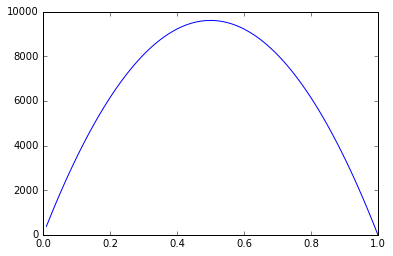

In [51]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(p_values, n_samples)

In [52]:
max(n_samples)

9604

In [53]:
int(np.ceil(samplesize_confint_proportion(0.5, 0.01)))

9604

# Quiz: доверительные интервалы
### Вопрос 1
В пятилетнем рандомизированном исследовании Гарвардской медицинской школы 11037 испытуемых через день принимали аспирин, а ещё 11034 — плацебо. Исследование было слепым, то есть, испытуемые не знали, что именно они принимают.

За 5 лет инфаркт случился у 104 испытуемых, принимавших аспирин, и у 189 принимавших плацебо.

Оцените, насколько вероятность инфаркта снижается при приёме аспирина. Округлите ответ до четырёх знаков после десятичной точки.

In [94]:
scipy.stats.norm.ppf(1 - 0.003 / 2.)   

2.9677379253417944

In [65]:
p1 = 189./11034  
p2 = 104./11037
p1 - p2

0.0077060239760047815

### Вопрос 2
Постройте теперь 95% доверительный интервал для снижения вероятности инфаркта при приёме аспирина. Чему равна его верхняя граница? Округлите ответ до четырёх знаков после десятичной точки.

   | $X_1$ | $X_2$  
  ------------- | -------------|
  1  | a | b 
  0  | c | d 
  $\sum$ | $n_1$| $n_2$
  
$$ \hat{p}_1 = \frac{a}{n_1}$$

$$ \hat{p}_2 = \frac{b}{n_2}$$


$$\text{Доверительный интервал для }p_1 - p_2\colon \;\; \hat{p}_1 - \hat{p}_2 \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{\hat{p}_1(1 - \hat{p}_1)}{n_1} + \frac{\hat{p}_2(1 - \hat{p}_2)}{n_2}}$$

In [66]:
import scipy
z = scipy.stats.norm.ppf(1 - 0.05 / 2.)  

In [72]:
s1 = 189
s2 = 104

n1 = 11034  
n2 = 11037

In [68]:
left_bound = p1 - p2 - z*np.sqrt(p1*(1-p1)/n1 + p2*(1-p2)/n2)
right_bound = p1 - p2 + z*np.sqrt(p1*(1-p1)/n1 + p2*(1-p2)/n2)

In [69]:
left_bound, right_bound

(0.0046877506750494392, 0.010724297276960124)

### Вопрос 3
Продолжим анализировать данные эксперимента Гарвардской медицинской школы.

Для бернуллиевских случайных величин X∼Ber(p) часто вычисляют величину p/1−p, которая называется шансами (odds). Чтобы оценить шансы по выборке, вместо p нужно подставить p^. Например, шансы инфаркта в контрольной группе, принимавшей плацебо, можно оценить как 0.0174
Оцените, во сколько раз понижаются шансы инфаркта при регулярном приёме аспирина. Округлите ответ до четырёх знаков после десятичной точки.

In [70]:
def get_odds(p):
    return p/(1-p)

In [71]:
get_odds(p1)/get_odds(p2)

1.8320539419087138

### Вопрос 4
Величина, которую вы оценили в предыдущем вопросе, называется отношением шансов. Постройте для отношения шансов 95% доверительный интервал с помощью бутстрепа. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

Чтобы получить в точности такой же доверительный интервал, как у нас:

 * составьте векторы исходов в контрольной и тестовой выборках так, чтобы в начале шли все единицы, а потом все нули;
 * установите random seed=0;
 * сделайте по 1000 псевдовыборок из каждой группы пациентов.

In [101]:
s1 = 189
s2 = 104

n1 = 11034  
n2 = 11037

placebo = np.array(s1*[1] + (n1 - s1)*[0])
aspirin = np.array(s2*[1] + (n2 - s2)*[0])

In [102]:
def get_bootstrap_samples(data, n_samples):
    np.random.seed(0)
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha = 0.05):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [106]:
def get_odds_values(values):
    p = float(sum(values))/len(values)
    return p/(1-p)

In [107]:
placebo_odds = map(get_odds_values, get_bootstrap_samples(placebo, 1000))
aspirin_odds = map(get_odds_values, get_bootstrap_samples(aspirin, 1000))

In [108]:
stat_intervals(map(lambda x: x[0]/x[1], zip(placebo_odds, aspirin_odds)))

array([ 1.63035462,  2.10397776])